In [2]:
from langgraph.graph import StateGraph, START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [5]:
load_dotenv()

model=ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [12]:
class BlogState(TypedDict):
    title:str
    outline:str
    content:str

In [13]:
def createOutline(state:BlogState)->BlogState:
    #fetch title
    title=state['title']
    #generate outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content
    #update state
    state['outline']=outline
    return state

In [14]:
def createBlog(state:BlogState)->BlogState:
    title=state['title']
    outline=state['outline']

    prompt=f'Write a detail blog on {title} using following outline \n {outline}'
    content=model.invoke(prompt).content
    state['content']=content

    return state

In [15]:
graph=StateGraph(BlogState)

graph.add_node('createOutline',createOutline)
graph.add_node('createBlog',createBlog)

graph.add_edge(START,'createOutline')
graph.add_edge('createOutline','createBlog')
graph.add_edge('createBlog',END)

workflow=graph.compile()

In [16]:
initial_state={'title':'Rise of India'}
final_state=workflow.invoke(initial_state)
final_state

{'title': 'Rise of India',
 'outline': 'Here\'s a detailed outline for a blog post on "The Rise of India," designed to be comprehensive, engaging, and structured for easy readability.\n\n---\n\n## Blog Post Outline: The Rise of India – Charting the Nation\'s Ascent to Global Prominence\n\n**Target Audience:** General readers, business professionals, policy enthusiasts, students interested in geopolitics and emerging economies.\n**Tone:** Optimistic yet realistic, analytical, informative, forward-looking.\n**Keywords:** India\'s rise, emerging economy, global power, demographic dividend, digital India, geopolitical influence, economic growth, soft power, BRICS, G20.\n\n---\n\n### **I. Catchy Title Options:**\n\n*   **The Ascent of a Giant: Decoding India\'s Rise to Global Prominence**\n*   **India\'s Moment: Why the World is Watching the Next Global Superpower**\n*   **Beyond the Numbers: The Multifaceted Rise of India**\n*   **From Ancient Civilization to Modern Powerhouse: India\'s Un

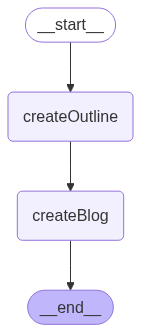

In [17]:
workflow

In [18]:
final_state['outline']

'Here\'s a detailed outline for a blog post on "The Rise of India," designed to be comprehensive, engaging, and structured for easy readability.\n\n---\n\n## Blog Post Outline: The Rise of India – Charting the Nation\'s Ascent to Global Prominence\n\n**Target Audience:** General readers, business professionals, policy enthusiasts, students interested in geopolitics and emerging economies.\n**Tone:** Optimistic yet realistic, analytical, informative, forward-looking.\n**Keywords:** India\'s rise, emerging economy, global power, demographic dividend, digital India, geopolitical influence, economic growth, soft power, BRICS, G20.\n\n---\n\n### **I. Catchy Title Options:**\n\n*   **The Ascent of a Giant: Decoding India\'s Rise to Global Prominence**\n*   **India\'s Moment: Why the World is Watching the Next Global Superpower**\n*   **Beyond the Numbers: The Multifaceted Rise of India**\n*   **From Ancient Civilization to Modern Powerhouse: India\'s Unstoppable Rise**\n\n### **II. Introduct